<a href="https://colab.research.google.com/github/karansjc1/segmentation/blob/master/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
import time
#from google.colab import files
#uncomment the above line tov use colab's files.upload function
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

2020-07-11 17:05:30 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


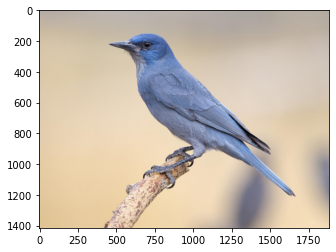

In [2]:
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img); plt.show()

In [3]:
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [4]:
def crop(image, source, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  foreground=cv2.imread(source)
  
  foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
  foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
  
  background=255*np.ones_like(rgb).astype(np.uint8)

  foreground=foreground.astype(float)
  background=background.astype(float)
  
  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)
  alpha = cv2.GaussianBlur(alpha, (7,7),0)
  alpha=alpha.astype(float)/255


  foreground=cv2.multiply(alpha,foreground)

  background=cv2.multiply(1.0-alpha,background)

  outImage=cv2.add(foreground,background)

  return outImage/255

In [5]:
def modify():
  ''' Use the below commented code to upload an image using colab.upload in colab notebook but then 
  there is no need to use img parameter and source parameter while using crop function'''
  
  # uploaded=files.upload()
  # for fn in uploaded.keys():
  #   path='/content/'+fn
  #   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  #   img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  trf = T.Compose([T.Resize(640),
                     T.ToTensor(),
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = dlab(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  result = decode_segmap(om) # use result = crop(om,source) while using crop function discussed later
  plt.imshow(result); plt.axis('off'); plt.show()

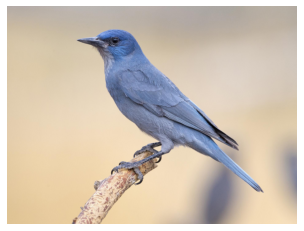

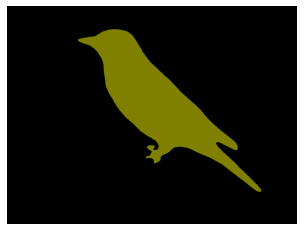

In [6]:
modify()

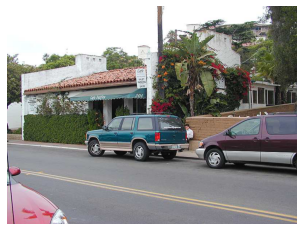

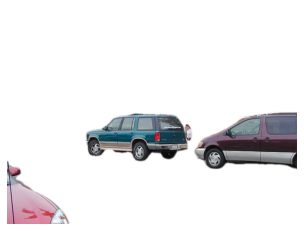

In [31]:
!wget http://www.public-domain-photos.com/free-stock-photos-4/vehicles/cars-street.jpg -O many.png
img = Image.open('./many.png')
plt.imshow(img); plt.axis('off'); plt.show()
modify('./many.png')